data : 교재 144쪽 mnist
- logistic, SGD 
- score로 과대적합/과소적합
- 분류 성능 리포트 
- 회귀 테스트 그림판에 직접 그려서 predict까지 해보기

In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
x,y = mnist.data, mnist.target
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
x.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

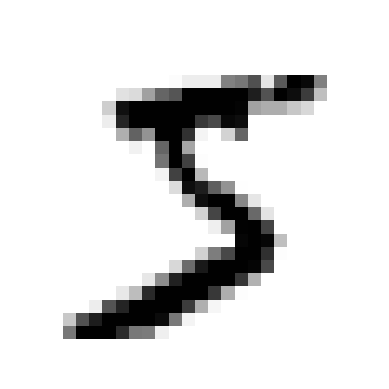

In [7]:
import matplotlib.pyplot as plt
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    
some_digit = x[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

In [9]:
xtrain, xtest, ytrain, ytest = x[:60000], x[60000:], y[:60000], y[:60000]

In [10]:
ytrain5 = (ytrain == '5') # 5 = True, other digits = False
ytest5 = (ytest == '5')

In [11]:
from sklearn.linear_model import SGDClassifier
sgdclf = SGDClassifier(random_state=42)
sgdclf.fit(xtrain, ytrain5)

SGDClassifier(random_state=42)

In [12]:
sgdclf.predict([some_digit])

array([ True])

In [13]:
from sklearn.model_selection import StratifiedGroupKFold, StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3) #데이터셋이 미리 섞여있지 않다면 shuffle = True를 추가해 섞어줘

for train_index, test_index in skfolds.split(xtrain, ytrain5):
    clone_clf = clone(sgdclf)
    xtrain_folds = xtrain[train_index]
    ytrain_folds = ytrain5[train_index]
    xtest_fold = xtrain[test_index]
    ytest_fold = ytrain5[test_index]
    clone_clf.fit(xtrain_folds, ytrain_folds)
    y_pred = clone_clf.predict(xtest_fold)
    n_correct = sum(y_pred == ytest_fold)
    print(n_correct /len(y_pred))

0.95035
0.96035
0.9604


In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdclf, xtrain, ytrain5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [16]:
md = LogisticRegression(max_iter=60000)

In [17]:
md.fit(xtrain, ytrain)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=60000)

In [18]:
y_pred = md.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)
print(accuracy)

0.9098571428571428


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

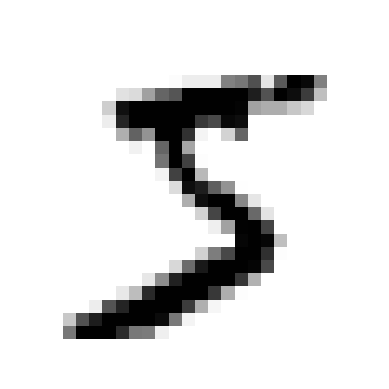

<class 'numpy.ndarray'>


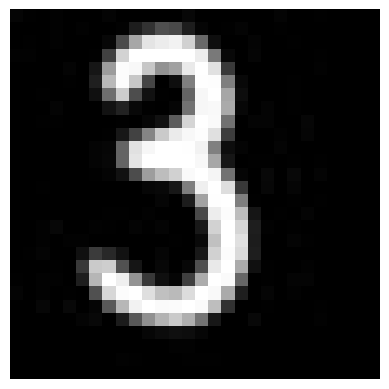

In [21]:

from PIL import Image


import matplotlib.pyplot as plt

def plot_digit(image) : #이미지 데이터 출력 함수.
    plt.imshow(image, cmap='binary') # binary = 0을 흰색, 255를 검은색으로 나타내는 흑백 컬러맴
    plt.axis('off') # 무슨 뜻? => 축을 표기하지 않음.

some_digit = x[0] # Aㅏ. 데이터 안에 들어있는 첫번째 이미지.
some_digit = some_digit.reshape(28,28)
print(some_digit)
plot_digit(some_digit)
plt.show()
print(type(some_digit)) # 파일 확인해봄.

from PIL import Image
import numpy as np

path = '3.jpg' #그림 경로
img = Image.open(path) # 그림 파일 연다
img = img.convert('L') # 그레이스케일로 변경
img = np.array(img) # narray로 형태 변환

plot_digit(img)




# path = '3.jpg'
# img = Image.open(path)
# img = np.array(img)
# plot_digit(img) 

# pxl = []
# image = Image.open('3.jpg')
# width, height = image.size
# for i in range(height):
#     for n in range(width):
#         pxl = np.array(image.getpixel((i,n)))
#         pxl.append(255 - pxl[1])
        